In [187]:
import pandas as pd
import datetime as dt
import numpy as np

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [188]:
sq_rv = pd.read_html('https://www.macrotrends.net/stocks/charts/SQ/square/revenue')
SQ_rev = sq_rv[1]
SQ_rev.head()

,Square Quarterly Revenue(Millions of US $),Square Quarterly Revenue(Millions of US $).1
0,2020-06-30,"$1,924"
1,2020-03-31,"$1,381"
2,2019-12-31,"$1,313"
3,2019-09-30,"$1,266"
4,2019-06-30,"$1,174"


In [189]:
SQ_rev = SQ_rev.rename(columns = {'Square Quarterly Revenue(Millions of US $)' : 'Quarterly Date', 
                                  'Square Quarterly Revenue(Millions of US $).1' : 'Square Quarterly Revenue (Millions of USD)'})

In [190]:
SQ_rev['Quarterly Date'] = pd.to_datetime(SQ_rev['Quarterly Date'])
SQ_rev.dtypes

Quarterly Date                                datetime64[ns]
Square Quarterly Revenue (Millions of USD)            object
dtype: object

In [191]:
SQ_rev = SQ_rev.sort_values(by="Quarterly Date")
SQ_rev

,Quarterly Date,Square Quarterly Revenue (Millions of USD)
24,2012-12-31,NaN
23,2013-12-31,NaN
22,2014-12-31,NaN
21,2015-03-31,$251
20,2015-06-30,$310
19,2015-09-30,$332
18,2015-12-31,$374
17,2016-03-31,$379
16,2016-06-30,$439
15,2016-09-30,$439


In [192]:
SQ_rev = SQ_rev.set_index('Quarterly Date')
SQ_rev

,Square Quarterly Revenue (Millions of USD)
Quarterly Date,
2012-12-31,NaN
2013-12-31,NaN
2014-12-31,NaN
2015-03-31,$251
2015-06-30,$310
2015-09-30,$332
2015-12-31,$374
2016-03-31,$379
2016-06-30,$439


In [193]:
SQ_rev['Square Quarterly Revenue (Millions of USD)'] = SQ_rev['Square Quarterly Revenue (Millions of USD)'].str.replace(r'$', '')
SQ_rev['Square Quarterly Revenue (Millions of USD)'] = SQ_rev['Square Quarterly Revenue (Millions of USD)'].str.replace(r',', '')
SQ_rev

,Square Quarterly Revenue (Millions of USD)
Quarterly Date,
2012-12-31,NaN
2013-12-31,NaN
2014-12-31,NaN
2015-03-31,251
2015-06-30,310
2015-09-30,332
2015-12-31,374
2016-03-31,379
2016-06-30,439


In [194]:
SQ_rev['Square Quarterly Revenue (Millions of USD)'] = pd.to_numeric(SQ_rev['Square Quarterly Revenue (Millions of USD)'], 
                                                                 downcast="float")
SQ_rev

,Square Quarterly Revenue (Millions of USD)
Quarterly Date,
2012-12-31,NaN
2013-12-31,NaN
2014-12-31,NaN
2015-03-31,251.0
2015-06-30,310.0
2015-09-30,332.0
2015-12-31,374.0
2016-03-31,379.0
2016-06-30,439.0


In [195]:
SQ_rev.dtypes

Square Quarterly Revenue (Millions of USD)    float32
dtype: object

In [196]:
SQ_rev['Pct Change by Quarter'] = SQ_rev['Square Quarterly Revenue (Millions of USD)'].pct_change() * 100
SQ_rev = SQ_rev.dropna()
SQ_rev

,Square Quarterly Revenue (Millions of USD),Pct Change by Quarter
Quarterly Date,,
2015-06-30,310.0,23.505974
2015-09-30,332.0,7.096779
2015-12-31,374.0,12.650597
2016-03-31,379.0,1.336896
2016-06-30,439.0,15.831137
2016-09-30,439.0,0.000000
2016-12-31,452.0,2.961278
2017-03-31,462.0,2.212393
2017-06-30,552.0,19.480515


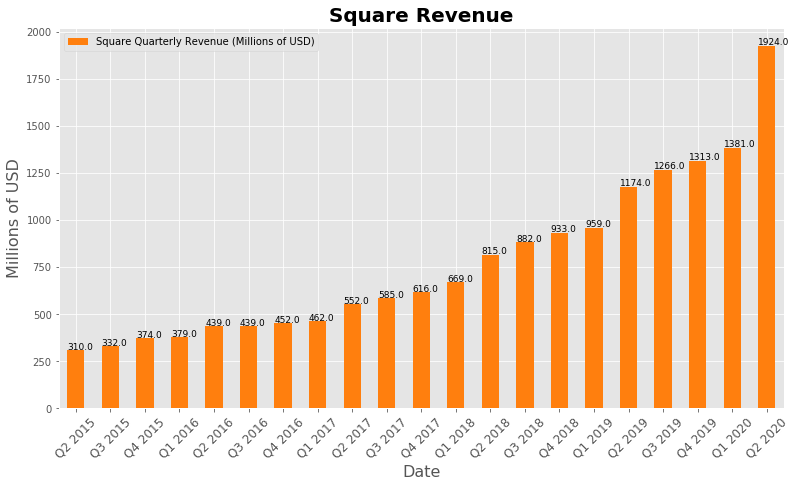

In [197]:
f, ax = plt.subplots(figsize=(13,7))

SQ_rev['Square Quarterly Revenue (Millions of USD)'].plot.bar(color='tab:orange')
ax.set_title('Square Revenue', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Millions of USD', fontsize = 16)
ax.set_xticks(range(0,21))
x_lab = ('Q2 2015', 'Q3 2015', 'Q4 2015', 'Q1 2016', 'Q2 2016', 'Q3 2016', 'Q4 2016', 
         'Q1 2017', 'Q2 2017', 'Q3 2017', 'Q4 2017', 'Q1 2018', 'Q2 2018', 'Q3 2018',
        'Q4 2018', 'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q4 2019', 'Q1 2020', 'Q2 2020')
ax.set_xticklabels(x_lab, rotation=45, fontsize = 12)
ax.legend()


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005), fontsize=9)

In [198]:
from pandas_datareader import data as web

start = dt.datetime(2015, 1, 1)

SQ_stock = web.DataReader('SQ', 'yahoo', start)['Close']
SQ_stock = pd.DataFrame(SQ_stock)
SQ_stock.tail()

,Close
Date,
2020-10-19,186.960007
2020-10-20,185.740005
2020-10-21,177.820007
2020-10-22,175.929993
2020-10-23,176.770004


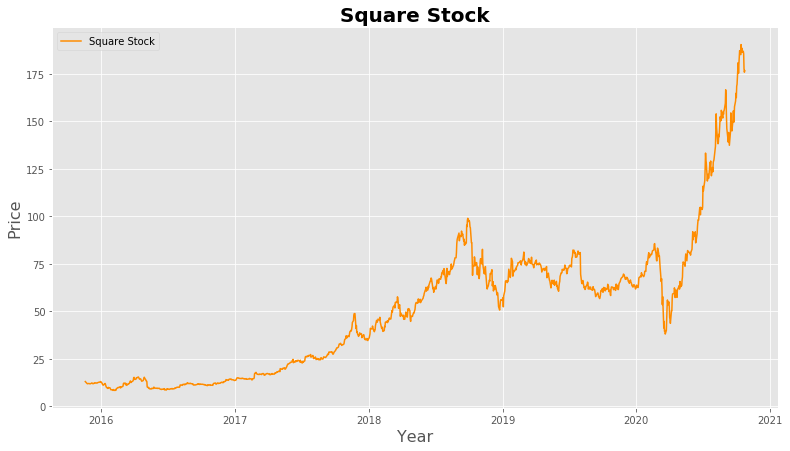

In [199]:
f, ax = plt.subplots(figsize=(13,7))

ax.plot(SQ_stock['Close'], color='darkorange', label = 'Square Stock')
ax.grid(True)
ax.set_title('Square Stock', fontsize =20, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Price', fontsize = 16)
ax.legend()

In [200]:
quarterly_price = SQ_stock.resample('Q').mean()
quarterly_price['Stock Pct Change'] = SQ_df['Close'].pct_change() * 100
quarterly_price = quarterly_price.dropna()
quarterly_price

,Close,Stock Pct Change
Date,,
2016-09-30,10.923750,-3.380415
2016-12-31,12.447936,13.952961
2017-03-31,15.641129,25.652384
2017-06-30,20.668889,32.144482
2017-09-30,26.175397,26.641529
2017-12-31,36.614127,39.879931
2018-03-31,45.898361,25.356971
2018-06-30,55.000312,19.830668
2018-09-30,77.126191,40.228642


In [201]:
SQ_rev_copy = SQ_rev.copy()
SQ_rev_copy = SQ_rev_copy.iloc[4:]
SQ_rev_copy.head()

,Square Quarterly Revenue (Millions of USD),Pct Change by Quarter
Quarterly Date,,
2016-06-30,439.0,15.831137
2016-09-30,439.0,0.000000
2016-12-31,452.0,2.961278
2017-03-31,462.0,2.212393
2017-06-30,552.0,19.480515


In [202]:
SQ_df = pd.merge(quarterly_price, SQ_rev_copy, right_index = True, left_index = True)
SQ_df.tail()

,Close,Stock Pct Change,Square Quarterly Revenue (Millions of USD),Pct Change by Quarter
2019-06-30,69.863650,-3.596234,1174.0,22.419189
2019-09-30,67.926406,-2.772893,1266.0,7.836461
2019-12-31,63.900469,-5.926910,1313.0,3.712475
2020-03-31,68.393064,7.030614,1381.0,5.178976
2020-06-30,76.558254,11.938623,1924.0,39.319336


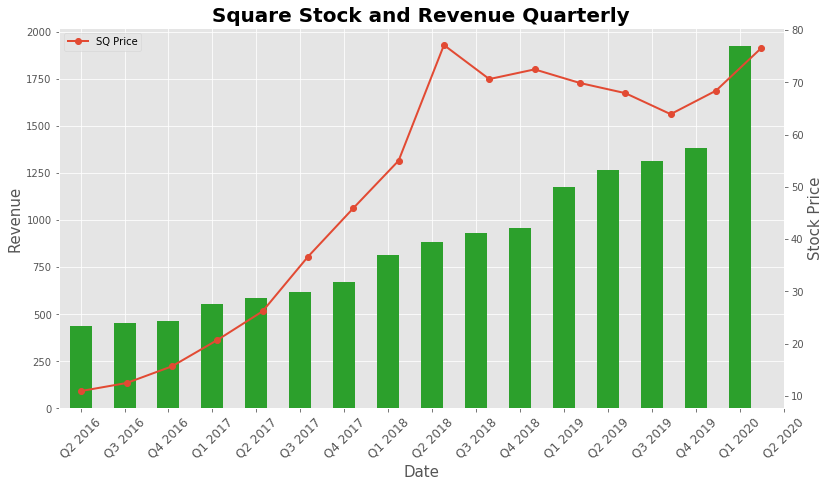

In [203]:
f, ax = plt.subplots(figsize=(13,7))

ax = SQ_df['Square Quarterly Revenue (Millions of USD)'].plot(kind='bar', use_index=True, color='tab:green', label = 'Revenue')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         SQ_df['Close'].values,
         linestyle='-',
         marker='o', linewidth=2.0, label = 'SQ Price')
ax.set_title('Square Stock and Revenue Quarterly', fontsize =20, fontweight = 'bold')
ax.set_xticks(range(0,17))
x_lab = ('Q2 2016', 'Q3 2016', 'Q4 2016', 
         'Q1 2017', 'Q2 2017', 'Q3 2017', 'Q4 2017', 'Q1 2018', 'Q2 2018', 'Q3 2018',
        'Q4 2018', 'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q4 2019', 'Q1 2020', 'Q2 2020')
ax.set_xticklabels(x_lab, rotation=45, fontsize = 12)
ax.set_ylabel('Revenue', fontsize = 15)
ax2.set_ylabel('Stock Price', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.grid(True)
ax2.grid(False)
plt.legend()

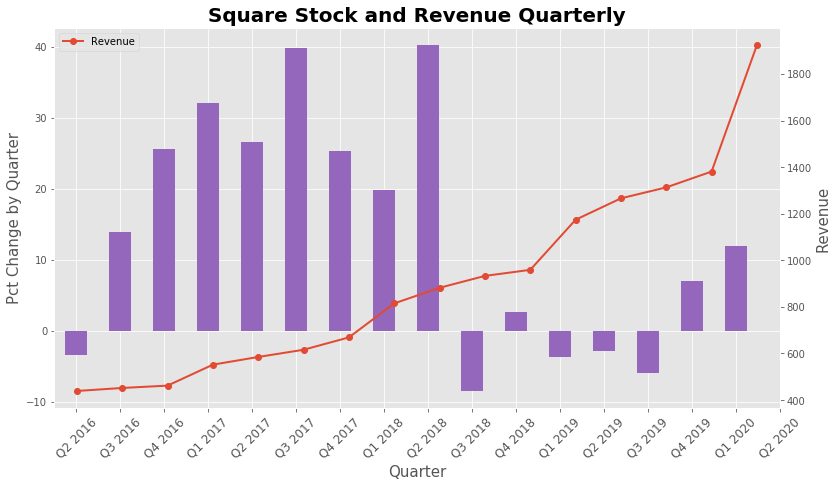

In [204]:
f, ax = plt.subplots(figsize=(13,7))

ax = SQ_df['Stock Pct Change'].plot(kind='bar', use_index=True, color='tab:purple')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         SQ_df['Square Quarterly Revenue (Millions of USD)'].values,
         linestyle='-',
         marker='o', linewidth=2.0, label = 'Revenue')
ax.set_title('Square Stock and Revenue Quarterly', fontsize =20, fontweight = 'bold')
ax.set_xticks(range(0,17))
x_lab = ('Q2 2016', 'Q3 2016', 'Q4 2016', 
         'Q1 2017', 'Q2 2017', 'Q3 2017', 'Q4 2017', 'Q1 2018', 'Q2 2018', 'Q3 2018',
        'Q4 2018', 'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q4 2019', 'Q1 2020', 'Q2 2020')
ax.set_xticklabels(x_lab, rotation=45, fontsize = 12)
ax.set_ylabel('Pct Change by Quarter', fontsize = 15)
ax2.set_ylabel('Revenue', fontsize = 15)
ax.set_xlabel('Quarter', fontsize = 15)
ax.grid(True)
ax2.grid(False)
plt.legend()